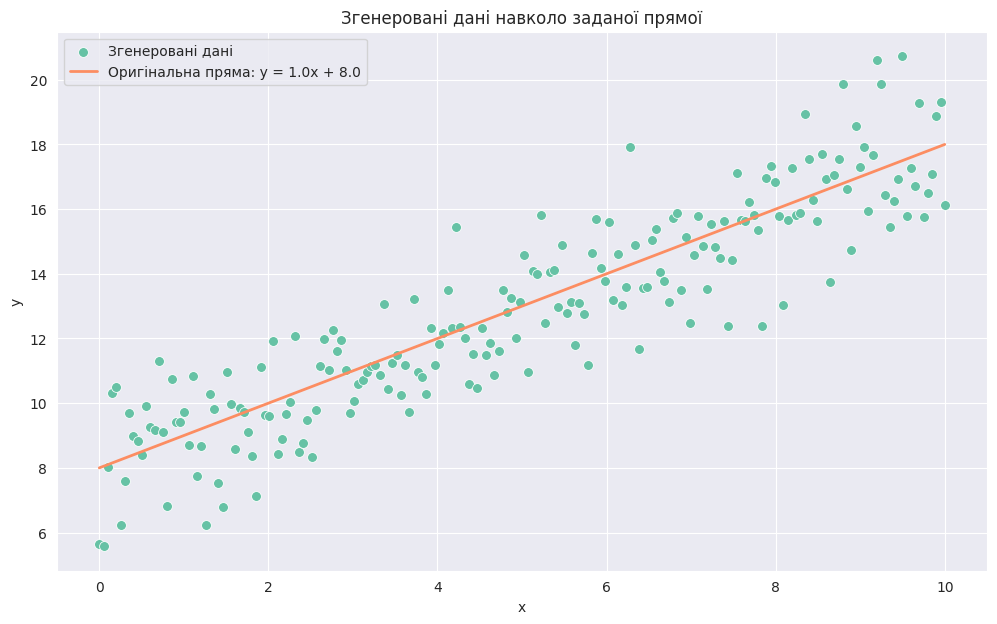

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Задаємо початкові параметри для прямої y = kx + b
k_orig = 1.0  # Початковий коефіцієнт k
b_orig = 8.0  # Початковий зсув b
n_points = 200 # Кількість точок

# Генеруємо значення x
x_data = np.linspace(0, 10, n_points)

# Генеруємо шум
noise = np.random.normal(0, 1.5, n_points)

# Генеруємо значення y навколо прямої y = kx + b
y_data = k_orig * x_data + b_orig + noise

# Створюємо y для "ідеальної" прямої (без шуму) для візуалізації
y_ideal_line = k_orig * x_data + b_orig

# Візуалізація згенерованих даних
sns.set_style("darkgrid")
plt.figure(figsize=(12, 7))
sns.scatterplot(x=x_data, y=y_data, label='Згенеровані дані', marker='o', s=50, color=sns.color_palette("Set2")[0])
sns.lineplot(x=x_data, y=y_ideal_line, label=f'Оригінальна пряма: y = {k_orig}x + {b_orig}', color=sns.color_palette("Set2")[1], linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Згенеровані дані навколо заданої прямої')
plt.show()

### 1.2. Функція, яка реалізує метод найменших квадратів

In [2]:
def least_squares_method(x, y):
    # Створюємо матрицю X, додаючи стовпець одиниць для вільного члена b
    X = np.vstack([x, np.ones(len(x))]).T
    # Вирішуємо систему лінійних рівнянь X * [k, b]^T = y
    k, b = np.linalg.lstsq(X, y, rcond=None)[0]
    return k, b

### 1.3. Порівняння знайдених параметрів з `np.polyfit` та початковими

In [3]:
# Знаходимо параметри за допомогою власної функції МНК
k_lsm, b_lsm = least_squares_method(x_data, y_data)

# Знаходимо параметри за допомогою np.polyfit
k_polyfit, b_polyfit = np.polyfit(x_data, y_data, 1)

print("--- Порівняння параметрів (Метод Найменших Квадратів) ---")
print(f"Оригінальні параметри: k = {k_orig:.4f}, b = {b_orig:.4f}")
print(f"МНК (власна функція): k = {k_lsm:.4f}, b = {b_lsm:.4f}")
print(f"np.polyfit:           k = {k_polyfit:.4f}, b = {b_polyfit:.4f}")

--- Порівняння параметрів (Метод Найменших Квадратів) ---
Оригінальні параметри: k = 1.0000, b = 8.0000
МНК (власна функція): k = 1.0088, b = 7.8230
np.polyfit:           k = 1.0088, b = 7.8230


### 1.4. Відображення на графіку знайдених оцінок лінії регресії

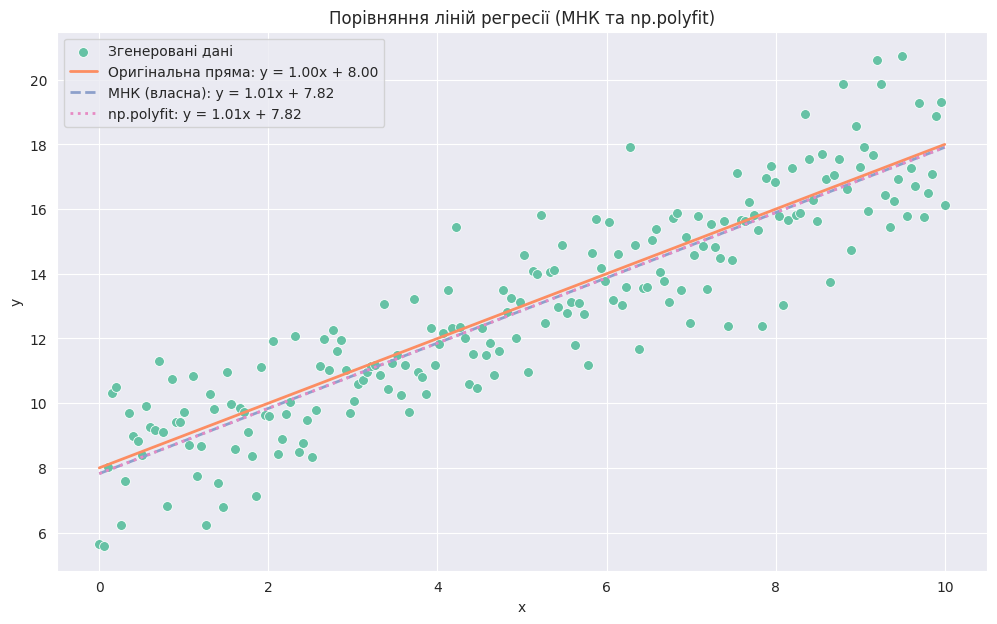

In [4]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=x_data, y=y_data, label='Згенеровані дані', marker='o', s=50, color=sns.color_palette("Set2")[0])
sns.lineplot(x=x_data, y=y_ideal_line, label=f'Оригінальна пряма: y = {k_orig:.2f}x + {b_orig:.2f}', color=sns.color_palette("Set2")[1], linewidth=2)
sns.lineplot(x=x_data, y=k_lsm * x_data + b_lsm, label=f'МНК (власна): y = {k_lsm:.2f}x + {b_lsm:.2f}', color=sns.color_palette("Set2")[2], linestyle='--', linewidth=2)
sns.lineplot(x=x_data, y=k_polyfit * x_data + b_polyfit, label=f'np.polyfit: y = {k_polyfit:.2f}x + {b_polyfit:.2f}', color=sns.color_palette("Set2")[3], linestyle=':', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Порівняння ліній регресії (МНК та np.polyfit)')
plt.show()

## Завдання 2: Метод Градієнтного Спуску

### 2.1. Функція, яка реалізує метод градієнтного спуску

In [5]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000, tol=1e-5):
    k_gd = 0.0
    b_gd = 0.0
    n = len(x)
    mse_history = [] # Історія значень середньоквадратичної похибки (MSE)

    for i in range(n_iter):
        y_predicted = k_gd * x + b_gd  # Поточне передбачення
        error = y_predicted - y        # Похибка
        
        mse = (1/n) * np.sum(error**2) # Середньоквадратична похибка
        mse_history.append(mse)
        
        # Обчислення градієнтів
        k_gradient = (2/n) * np.dot(error, x) # d(MSE)/dk
        b_gradient = (2/n) * np.sum(error)    # d(MSE)/db
        
        # Оновлення параметрів
        k_gd -= learning_rate * k_gradient
        b_gd -= learning_rate * b_gradient
        
        # Умова ранньої зупинки
        if i > 0 and abs(mse_history[-1] - mse_history[-2]) < tol:
            print(f"Градієнтний спуск зупинено на ітерації {i+1} через мінімальну зміну похибки.")
            break
            
    if i == n_iter - 1 and not (i > 0 and abs(mse_history[-1] - mse_history[-2]) < tol):
        print(f"Градієнтний спуск завершив усі {n_iter} ітерацій.")
            
    return k_gd, b_gd, mse_history

learning_rate_gd = 0.01
n_iterations_gd = 5000
tolerance_gd = 1e-6

k_gd, b_gd, mse_history = gradient_descent(x_data, y_data, 
                                           learning_rate=learning_rate_gd, 
                                           n_iter=n_iterations_gd, 
                                           tol=tolerance_gd)

print("\n--- Параметри, знайдені Градієнтним Спуском ---")
print(f"Градієнтний спуск: k = {k_gd:.4f}, b = {b_gd:.4f}")

Градієнтний спуск зупинено на ітерації 1202 через мінімальну зміну похибки.

--- Параметри, знайдені Градієнтним Спуском ---
Градієнтний спуск: k = 1.0118, b = 7.8031


### 2.2. Додавання отриманої лінії регресії на загальний графік

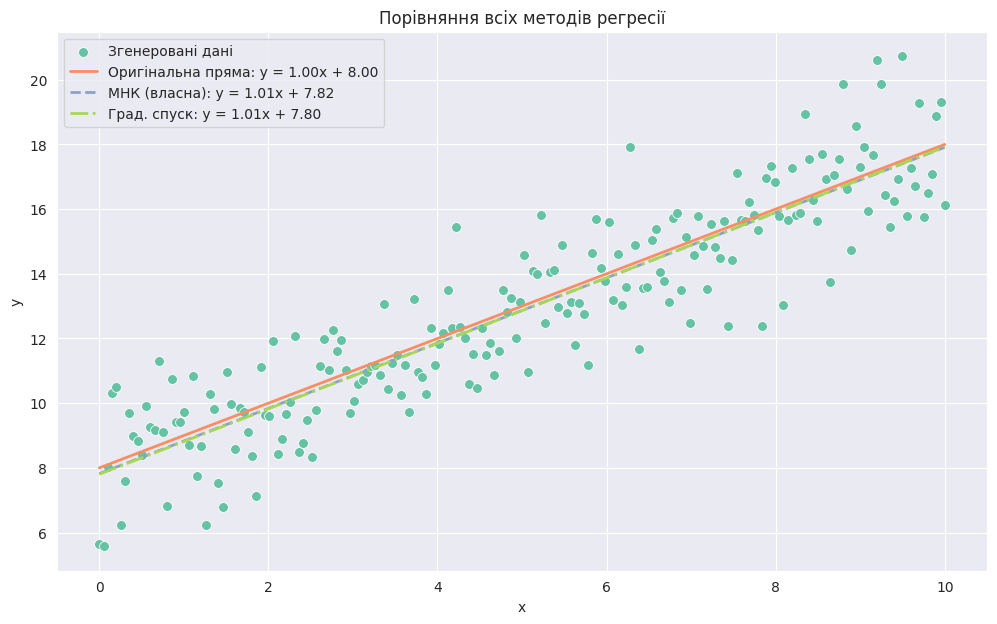

In [6]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=x_data, y=y_data, label='Згенеровані дані', marker='o', s=50, color=sns.color_palette("Set2")[0])
sns.lineplot(x=x_data, y=y_ideal_line, label=f'Оригінальна пряма: y = {k_orig:.2f}x + {b_orig:.2f}', color=sns.color_palette("Set2")[1], linewidth=2)
sns.lineplot(x=x_data, y=k_lsm * x_data + b_lsm, label=f'МНК (власна): y = {k_lsm:.2f}x + {b_lsm:.2f}', color=sns.color_palette("Set2")[2], linestyle='--', linewidth=2)
sns.lineplot(x=x_data, y=k_gd * x_data + b_gd, label=f'Град. спуск: y = {k_gd:.2f}x + {b_gd:.2f}', color=sns.color_palette("Set2")[4], linestyle='-.', linewidth=2)
        
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Порівняння всіх методів регресії')
plt.show()

### 2.3. Графік похибки від кількості ітерацій та висновки

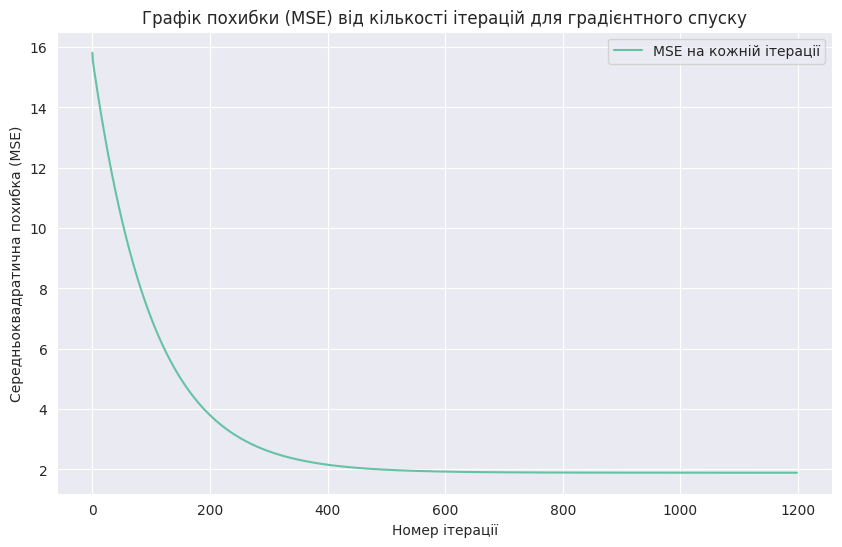

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(mse_history[3:])), y=mse_history[3:], label='MSE на кожній ітерації', color=sns.color_palette("Set2")[0])
plt.xlabel('Номер ітерації')
plt.ylabel('Середньоквадратична похибка (MSE)')
plt.legend()
plt.title('Графік похибки (MSE) від кількості ітерацій для градієнтного спуску')
plt.show()

### 2.4. Порівняння отриманих результатів з результатами попереднього завдання та загальні висновки

In [8]:
print("Загальне порівняння результатів")
print(f"Оригінальні параметри:      k = {k_orig:.4f}, b = {b_orig:.4f}")
print(f"МНК (власна функція):      k = {k_lsm:.4f}, b = {b_lsm:.4f} (Різниця з оригіналом: k_diff={(k_lsm-k_orig):.4f}, b_diff={(b_lsm-b_orig):.4f})")
print(f"np.polyfit:                k = {k_polyfit:.4f}, b = {b_polyfit:.4f} (Різниця з оригіналом: k_diff={(k_polyfit-k_orig):.4f}, b_diff={(b_polyfit-b_orig):.4f})")
print(f"Градієнтний спуск:         k = {k_gd:.4f}, b = {b_gd:.4f} (Різниця з оригіналом: k_diff={(k_gd-k_orig):.4f}, b_diff={(b_gd-b_orig):.4f})")

Загальне порівняння результатів
Оригінальні параметри:      k = 1.0000, b = 8.0000
МНК (власна функція):      k = 1.0088, b = 7.8230 (Різниця з оригіналом: k_diff=0.0088, b_diff=-0.1770)
np.polyfit:                k = 1.0088, b = 7.8230 (Різниця з оригіналом: k_diff=0.0088, b_diff=-0.1770)
Градієнтний спуск:         k = 1.0118, b = 7.8031 (Різниця з оригіналом: k_diff=0.0118, b_diff=-0.1969)
